# Install Dependancies

In [1]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Import Libraries

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# https://huggingface.co/docs/transformers/en/model_doc/distilbert#transformers.DistilBertTokenizer

In [4]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModel

# ready made
from transformers import DistilBertTokenizer
from transformers import DistilBertForSequenceClassification

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

# Data

In [6]:
data = load_dataset('emotion')
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = data['train']
test_ds= data['test']
val_ds = data['validation']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
# check the features
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
## get the all classlables
labels = train_ds.features['label'].names
print(f"In total we have {len(labels)} labels")
print(f"All available labels are :{labels}")

In total we have 6 labels
All available labels are :['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [10]:
# label2Ids, Ids2Lable
label2Ids ={label:idx for idx , label in enumerate(labels)}
Ids2Label = {idx:label for idx , label in enumerate(labels)}
label2Ids, Ids2Label

({'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5},
 {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'})

In [11]:
## let's look at the data
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [12]:
## let's check the first 4 records
train_ds[:4]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property'],
 'label': [0, 0, 3, 2]}

In [13]:
# convert torch dataset to Pandas format
train_ds.set_format("pandas")
df = train_ds[:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [14]:
df['emotions'] = df['label'].map(Ids2Label)
df.head()

,text,label,emotions
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## check the lables/emotions distribution

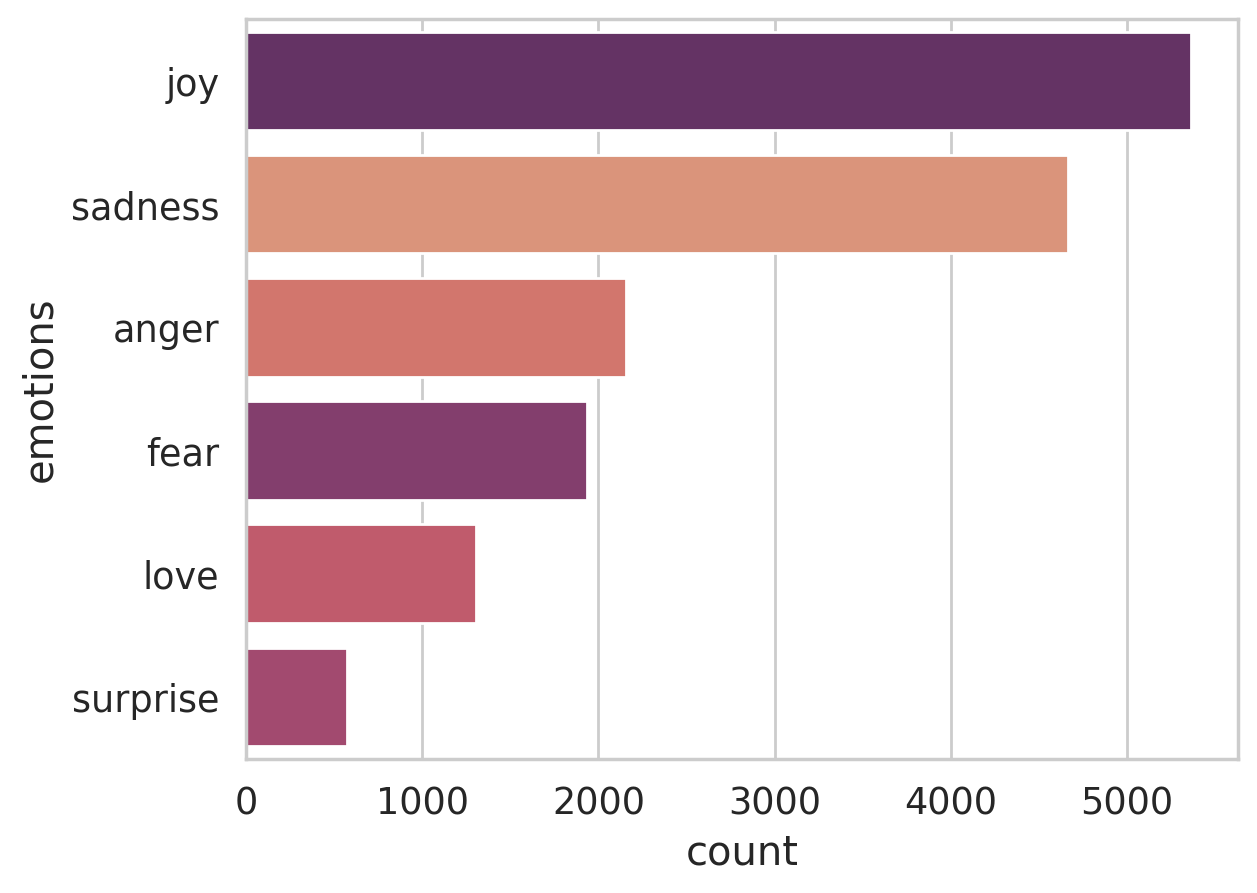

In [15]:
sns.color_palette("flare")
sns.countplot(y='emotions', data=df, hue='emotions', palette='flare',  order=df['emotions'].value_counts().index)
plt.show()
## as we can see, joy and sadness have highest distribution


    # to tackle this we can (check imbalance-learn library)
  - randomely oversampled the minority class
  - randomely undersample the majority class
  - gather more label data for underrepresented class

## how long our twits in train data

In [16]:
df['len_of_twits'] = df['text'].str.split().apply(len)
df.head()

,text,label,emotions,len_of_twits
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


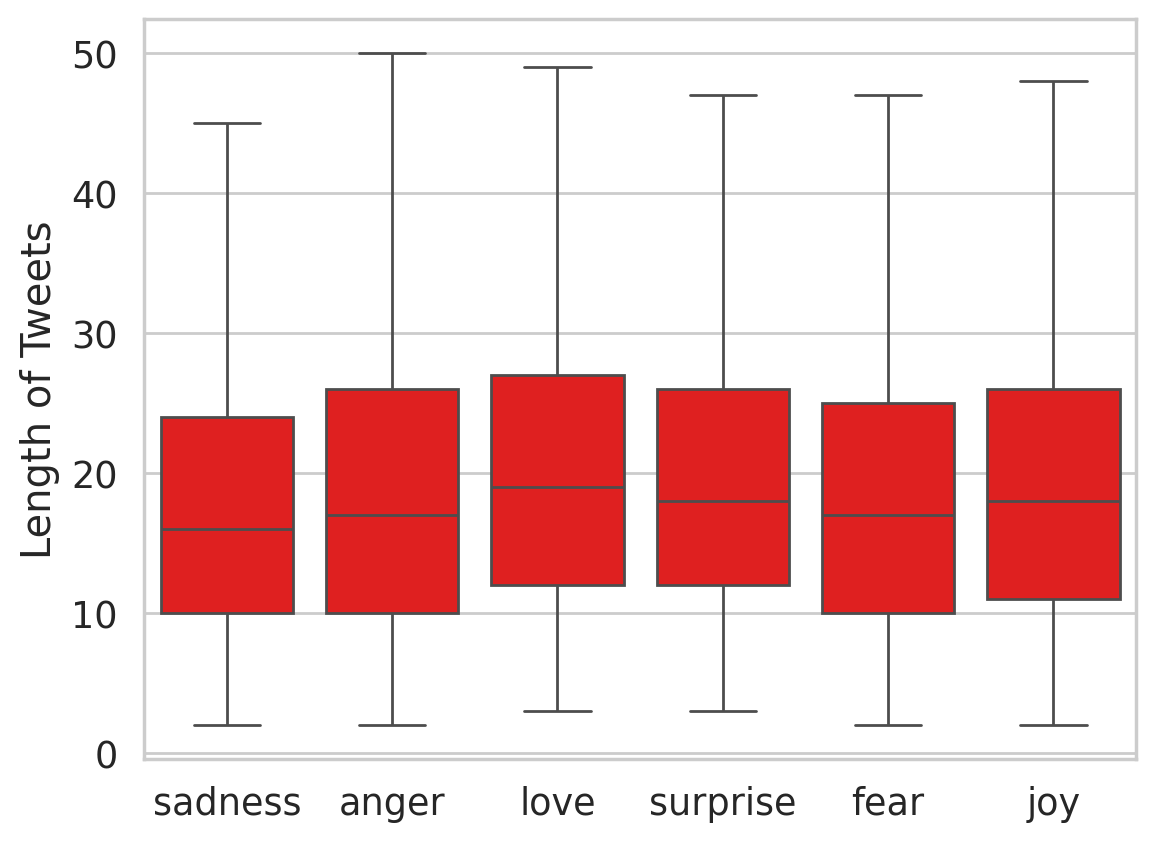

In [17]:
# Boxplot with Seaborn
sns.boxplot(
    data=df,
    x="emotions",
    y="len_of_twits",
    showfliers=False,
    color="red"
)

# Adjustments to match the Pandas boxplot behavior
plt.suptitle("")  # Remove the default title
plt.xlabel("")    # Remove the x-axis label
plt.ylabel("Length of Tweets")  # Optional: add a label to y-axis for clarity
plt.title("")  # Remove plot title
plt.show()

In [18]:
# we can see most twits are around 15 words long
# and logest twits are less the max_context_length of distilbert which is 512
# hence, there is no chance of truncation of twits which is good

In [19]:
## reset_the format
train_ds.reset_format()

In [20]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

# Tokenizer

In [21]:
# loading pre-trained tokenizer
# this is based on wordpiece method
ModelName= "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(ModelName)
tokenizer

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [22]:
## simple tutorial
text = "Are you leaving mumbai?"
token_ids = tokenizer.encode(text)
print("token Ids :", token_ids)
print("tokens to ids to labels : ", tokenizer.convert_ids_to_tokens(token_ids))
print("Ids to string : ", tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(token_ids)))
print("mapped : ", list(zip(tokenizer.convert_ids_to_tokens(token_ids), token_ids)))

token Ids : [101, 2024, 2017, 2975, 8955, 1029, 102]
tokens to ids to labels :  ['[CLS]', 'are', 'you', 'leaving', 'mumbai', '?', '[SEP]']
Ids to string :  [CLS] are you leaving mumbai? [SEP]
mapped :  [('[CLS]', 101), ('are', 2024), ('you', 2017), ('leaving', 2975), ('mumbai', 8955), ('?', 1029), ('[SEP]', 102)]


In [23]:
# each tokenizer uses special tokens
special_token_map = tokenizer.special_tokens_map
print(special_token_map)


{'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}


In [24]:
## ids for special tokens
tokenizer.unk_token_id

100

In [25]:
tokenizer.mask_token, tokenizer.mask_token_id

('[MASK]', 103)

In [26]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [27]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [28]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [29]:
# tokenizer vocab size
tokenizer.vocab_size

30522

In [30]:
tokenizer.init_kwargs # as we can see model_max length is 512

{'do_lower_case': True,
 'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]',
 'tokenize_chinese_chars': True,
 'strip_accents': None,
 'model_max_length': 512,
 'name_or_path': 'distilbert-base-uncased'}

## Tokenizing the whole dataset

In [31]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

train_ds_tokenized = train_ds.map(tokenize, batched=True)
train_ds_tokenized

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [32]:
## see the tokenized data
print(train_ds_tokenized[0])

{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [33]:
# similarely tokenize the test & valdiation dataset as well
test_ds_tokenized = test_ds.map(tokenize, batched=True)
val_ds_tokenized = val_ds.map(tokenize, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [34]:
print(test_ds_tokenized[0])
print(val_ds_tokenized[0])

{'text': 'im feeling rather rotten so im not very ambitious right now', 'label': 0, 'input_ids': [101, 10047, 3110, 2738, 11083, 2061, 10047, 2025, 2200, 12479, 2157, 2085, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
{'text': 'im feeling quite sad and sorry for myself but ill snap out of it soon', 'label': 0, 'input_ids': [101, 10047, 3110, 3243, 6517, 1998, 3374, 2005, 2870, 2021, 5665, 10245, 2041, 1997, 2009, 2574, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0

# Modeling part

In [35]:
from transformers import AutoModel
# ready made model
from transformers import DistilBertForSequenceClassification # another way to import distillBert model for sequence classification

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
device = torch.device(device)
device

cuda


device(type='cuda')

In [37]:
# but here we'll create the model for classification from scratch
model_name = "distilbert-base-uncased"
model = AutoModel.from_pretrained(model_name).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [38]:
# 30522:

# This is the vocabulary size, meaning the embedding layer has 30,522 unique tokens (words, subwords, or special tokens) in its vocabulary.
# Each token in this vocabulary is represented by a unique integer ID, ranging from 0 to 30521

In [39]:
# # the word other than 30522, is represented by unknown word toke [UNK]
# With Subword Tokenization: The word "pineapple" might be split into subwords like ["pine", "##apple"].
# Each subword has an embedding.
# If Entirely OOV: If a word cannot be split into valid tokens from the vocabulary, it is replaced by <unk>.

In [40]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [41]:
# embedding dims : 765
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [55]:
model.device

device(type='cuda', index=0)

## extracting the hidden states

In [42]:
text= "this is a test"
tokenized_ids = tokenizer.encode_plus(text, return_tensors='pt')
tokenized_ids

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [43]:
# transfering the tokenized data to the same device
tokenized_ids = {k:v.to(device) for k, v in tokenized_ids.items()}
tokenized_ids

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [44]:
# inferencing
with torch.no_grad():
  # gradient tracking is off
  output = model(**tokenized_ids)

output

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [45]:
# inferencing can be done in both ways
with torch.no_grad():
  # gradient tracking is off
  output = model(input_ids = tokenized_ids['input_ids'],
                 attention_mask = tokenized_ids['attention_mask'])

output

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [46]:
output.keys()

odict_keys(['last_hidden_state'])

In [47]:
# check the last hidden state dimention
output.last_hidden_state.shape # [batch_size, n_tokens, hidden_dims]

torch.Size([1, 6, 768])

In [48]:
output.last_hidden_state

tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0')

## For classification task is **common practice to use [CLS]** token embddings as it represent the whole sequence

In [49]:
## so we want the first token embedding which is [CLS] token
## let's do slicing

cls_token_embedding = output.last_hidden_state[:,0,:]
cls_token_embedding.shape

torch.Size([1, 768])

In [50]:
print(train_ds_tokenized[0])
train_ds_tokenized

{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [51]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## helper function

In [52]:
# ## let's create the common function which will get the hidden state embeddding for all the data
# def extract_hidden_state(batch):
#   # transfer the tokens to the same device
#   # tokenizer.model_input_names >> ['input_ids', 'attention_mask']
#   # inputs= {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
#   input_ids = batch['input_ids'].to(device)
#   attention_mask = batch['attention_mask'].to(device)
#   with torch.no_grad():
#     # last_hidden_state = model(input_ids= batch['input_ids'],
#     #                           attention_mask= batch['attention_mask']).last_hidden_state
#     last_hidden_state = model(input_ids= input_ids,
#                               attention_mask= attention_mask).last_hidden_state
#     # return the vector for [CLS] token
#     return {"hidden_state": last_hidden_state[:0:].cpu().numpy()}

In [53]:
## let's create the common function which will get the hidden state embeddding for all the data
def extract_hidden_state(batch):
  input_ids = batch['input_ids'].to(device)
  attention_mask = batch['attention_mask'].to(device)
  with torch.no_grad():
    last_hidden_state = model(input_ids= input_ids,
                              attention_mask= attention_mask)
    last_hidden_state = last_hidden_state.last_hidden_state
    # return the vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0,:].cpu().numpy()}

In [57]:
## since, our model expects input as torch tensor
train_ds_tokenized.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])
test_ds_tokenized.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])
val_ds_tokenized.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

In [187]:
## testing
# sample = train_ds_tokenized.select(range(0,100))
# sample
# with torch.no_grad():
#   # gradient tracking is off
#   input_ids = sample['input_ids'].to(device)
#   attention_mask = sample['attention_mask'].to(device)
#   output = model(input_ids = input_ids,
#                  attention_mask = attention_mask)

# output

In [58]:
## Extract the last hidden state for all dfs
## make sure your input_ids & model is on same device
train_hidden_state = train_ds_tokenized.map(extract_hidden_state, batched=True)
test_hidden_state = test_ds_tokenized.map(extract_hidden_state, batched=True)
val_hidden_state = val_ds_tokenized.map(extract_hidden_state, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

# **Train Logistic Regression Model on Extracted last hidden state features**

In [59]:
train_hidden_state['hidden_state'].shape

torch.Size([16000, 768])

In [60]:
## creating feature matrix
import numpy as np

x_train = np.array(train_hidden_state['hidden_state'])
x_valid = np.array(val_hidden_state['hidden_state'])
y_train = np.array(train_hidden_state['label'])
y_valid = np.array(val_hidden_state['label'])

x_train.shape, x_valid.shape

((16000, 768), (2000, 768))

In [61]:
## training simple Classfier
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(x_train, y_train)
lr_clf.score(x_valid, y_valid)

0.633

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrics(y_preds, y_true, labels):
  cm= confusion_matrix(y_true, y_preds, normalize='true')
  fig, ax = plt.subplots(figsize=(7,7))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format='.2f', ax=ax, colorbar=False)
  plt.title("Normalized Confusion Matrix")
  plt.show()


In [63]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [64]:
y_preds = lr_clf.predict(x_valid)


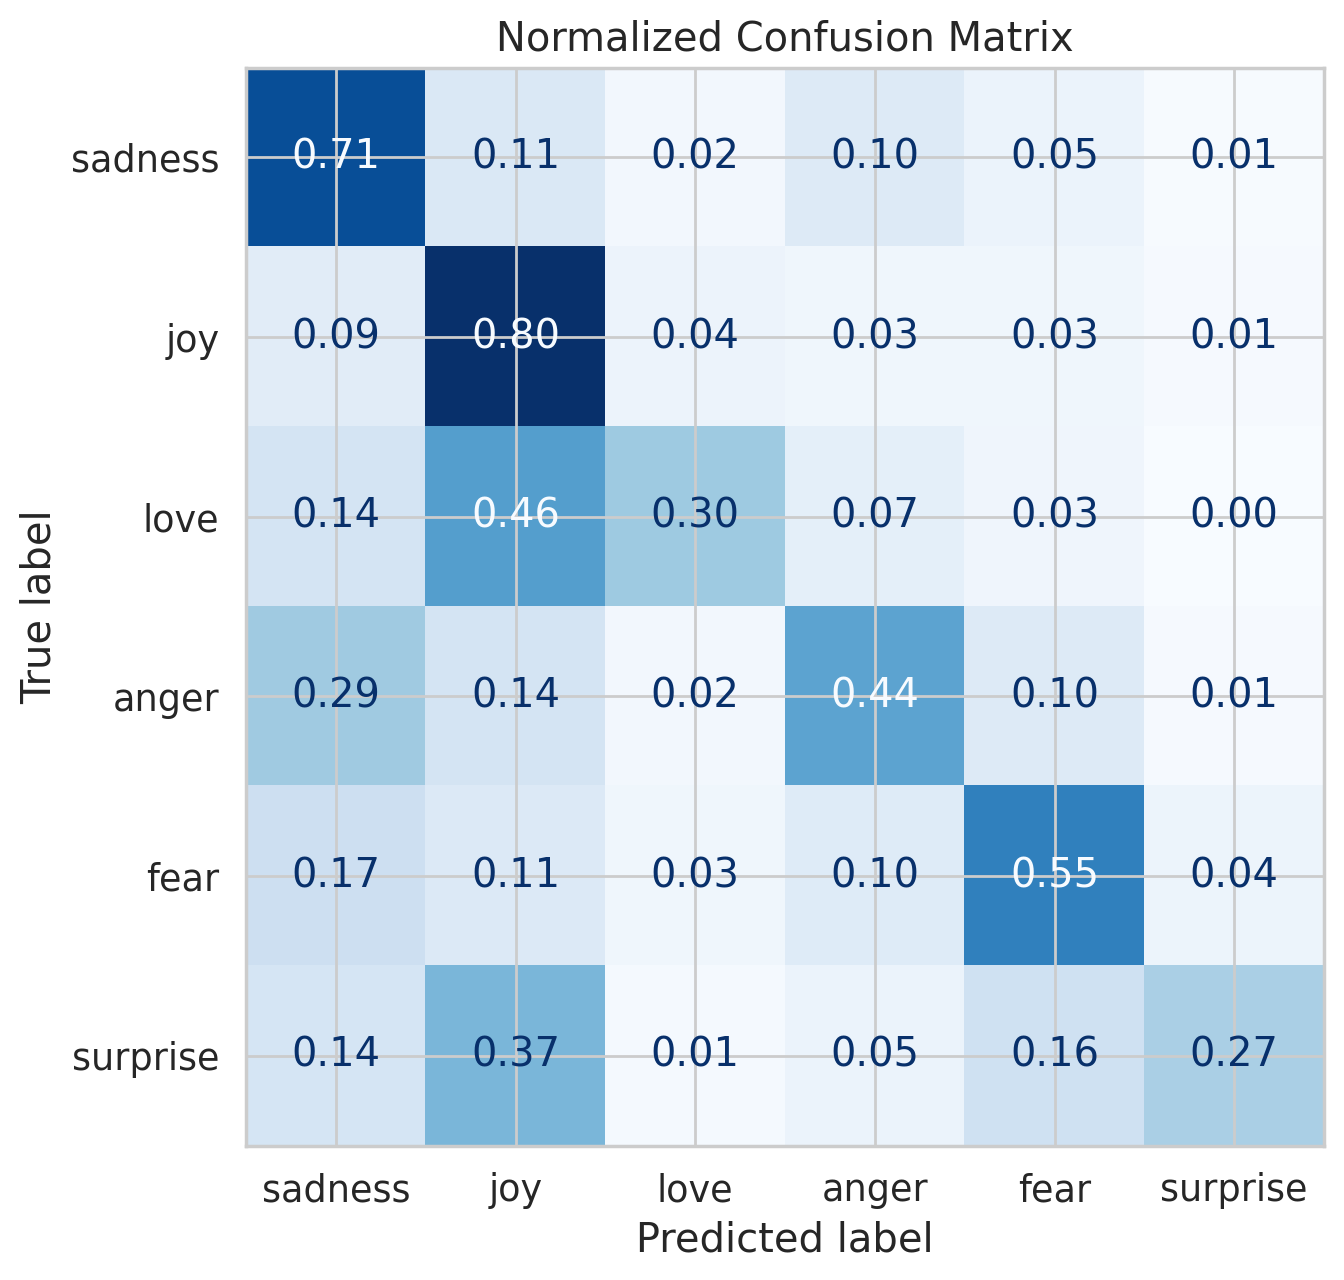

In [65]:
plot_confusion_matrics(y_preds, y_valid, labels)

  - we can see, model is confused between anger and sadness
  - also love and surprise mistakenly predicted as joy

# **Fine Tuning Transformers**

In [66]:
model_name, labels, len(labels)

('distilbert-base-uncased',
 ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
 6)

In [67]:
# loading pretrained transformer model

from transformers import AutoModelForSequenceClassification
model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels)).to(device)
model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [73]:
## some parts of mdoel is randomely initialize as they've added linear/Dense layer for classification with some random weights
# which we'll train

In [74]:
## define the performance metrics
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [75]:
# training process
from transformers import TrainingArguments, Trainer
batch_size = 64
logging_steps = len(train_ds_tokenized) // batch_size
model_name = "distilbert-base-uncased"
model_name = f"{model_name}_finetuned_on_emotions_data"
print("logging steps : ", logging_steps)
print(model_name)

logging steps :  250
distilbert-base-uncased_finetuned_on_emotions_data


In [77]:
os.getcwd()

'/content/drive/MyDrive/NlpWithTransformers/TextClassification'

In [78]:
# import os
# os.getcwd()
# os.chdir("./drive/MyDrive/NlpWithTransformers/TextClassification")
# os.getcwd()

In [79]:
from huggingface_hub import notebook_login
notebook_login()

In [80]:
trainig_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=4,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                 per_device_eval_batch_size=batch_size,
                                 weight_decay=0.01,
                                 eval_strategy="epoch",
                                 disable_tqdm=False,
                                 logging_steps=logging_steps,
                                 push_to_hub=False,
                                 log_level="error")

In [81]:
train_ds_tokenized

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [154]:
train_ds_tokenized[0]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [82]:
trainer = Trainer(model=model,
                  args=trainig_args,
                  compute_metrics=compute_metrics,
                  train_dataset =  train_ds_tokenized,
                  eval_dataset = val_ds_tokenized,
                  tokenizer=tokenizer,
                  )

<ipython-input-82-056fa355d073>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [83]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.782400,0.271710,0.914500,0.914893
2,0.209300,0.178772,0.930000,0.930646
3,0.137900,0.159415,0.934500,0.934880
4,0.110600,0.156120,0.933000,0.932850


TrainOutput(global_step=1000, training_loss=0.31004574966430665, metrics={'train_runtime': 505.4704, 'train_samples_per_second': 126.615, 'train_steps_per_second': 1.978, 'total_flos': 1438152103671552.0, 'train_loss': 0.31004574966430665, 'epoch': 4.0})

In [84]:
trainer.push_to_hub(commit_message="Training complete")

events.out.tfevents.1735408017.2a3b9b6bac3a.130.0:   0%|          | 0.00/7.98k [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Shubhu07/distilbert-base-uncased_finetuned_on_emotions_data/commit/67f9ee980e7704250889f7d577a4b7db1ab9ecab', commit_message='Training complete', commit_description='', oid='67f9ee980e7704250889f7d577a4b7db1ab9ecab', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Shubhu07/distilbert-base-uncased_finetuned_on_emotions_data', endpoint='https://huggingface.co', repo_type='model', repo_id='Shubhu07/distilbert-base-uncased_finetuned_on_emotions_data'), pr_revision=None, pr_num=None)

## **val preds**

In [85]:
val_preds_output = trainer.predict(val_ds_tokenized)

In [89]:
val_preds_output.metrics

{'test_loss': 0.15612030029296875,
 'test_accuracy': 0.933,
 'test_f1': 0.9328495124347471,
 'test_runtime': 3.7585,
 'test_samples_per_second': 532.129,
 'test_steps_per_second': 8.514}

In [93]:
# IT also contains raw predictions for each class
val_preds_output.predictions[0], np.argmax(val_preds_output.predictions[0])


(array([ 5.8021913 , -0.85590047, -1.2929506 , -1.1585909 , -1.0731257 ,
        -2.0215619 ], dtype=float32),
 0)

In [96]:
y_val_preds = np.argmax(val_preds_output.predictions, axis=1) # for each row finding armax
y_val_preds

array([0, 0, 2, ..., 1, 1, 1])

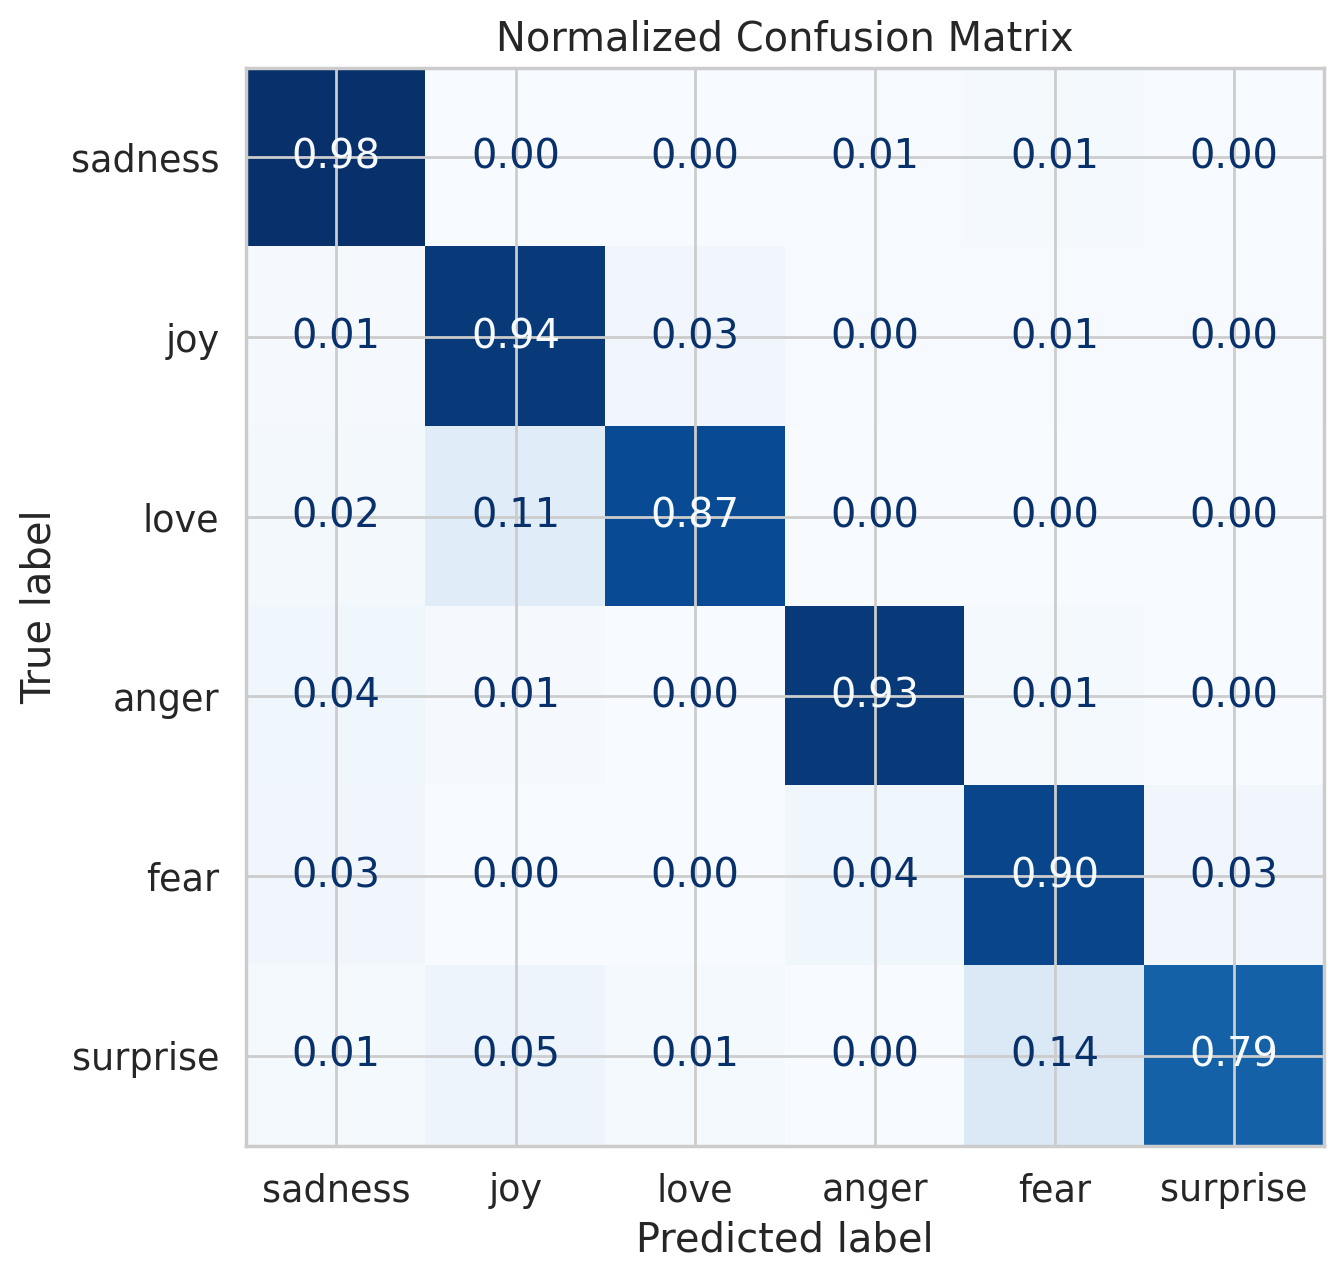

In [99]:
plot_confusion_matrics(y_val_preds, y_valid, labels)

    ## this is much closer diagonal confusion matrix
    ## The love category is still confused with Joy, which seems natural
    ## Suprise also frequently mistaken with joy or confused with fear
    ## Overall performance of model seems good, let's do error analysis

In [100]:
## this is much closer diagonal confusion matrix
## The love category is still confused with Joy, which seems natural
## Suprise also frequently mistaken with joy or confused with fear
## Overall performance of model seems good, let's do error analysis

## test_preds

In [101]:
test_preds_output = trainer.predict(test_ds_tokenized)

In [102]:
# unseen data
test_preds_output.metrics

{'test_loss': 0.17098471522331238,
 'test_accuracy': 0.925,
 'test_f1': 0.9242380244821876,
 'test_runtime': 4.016,
 'test_samples_per_second': 498.003,
 'test_steps_per_second': 7.968}

In [103]:
y_test_preds = np.argmax(test_preds_output.predictions, axis=1) # for each row finding armax
y_test_preds

array([0, 0, 0, ..., 1, 1, 4])

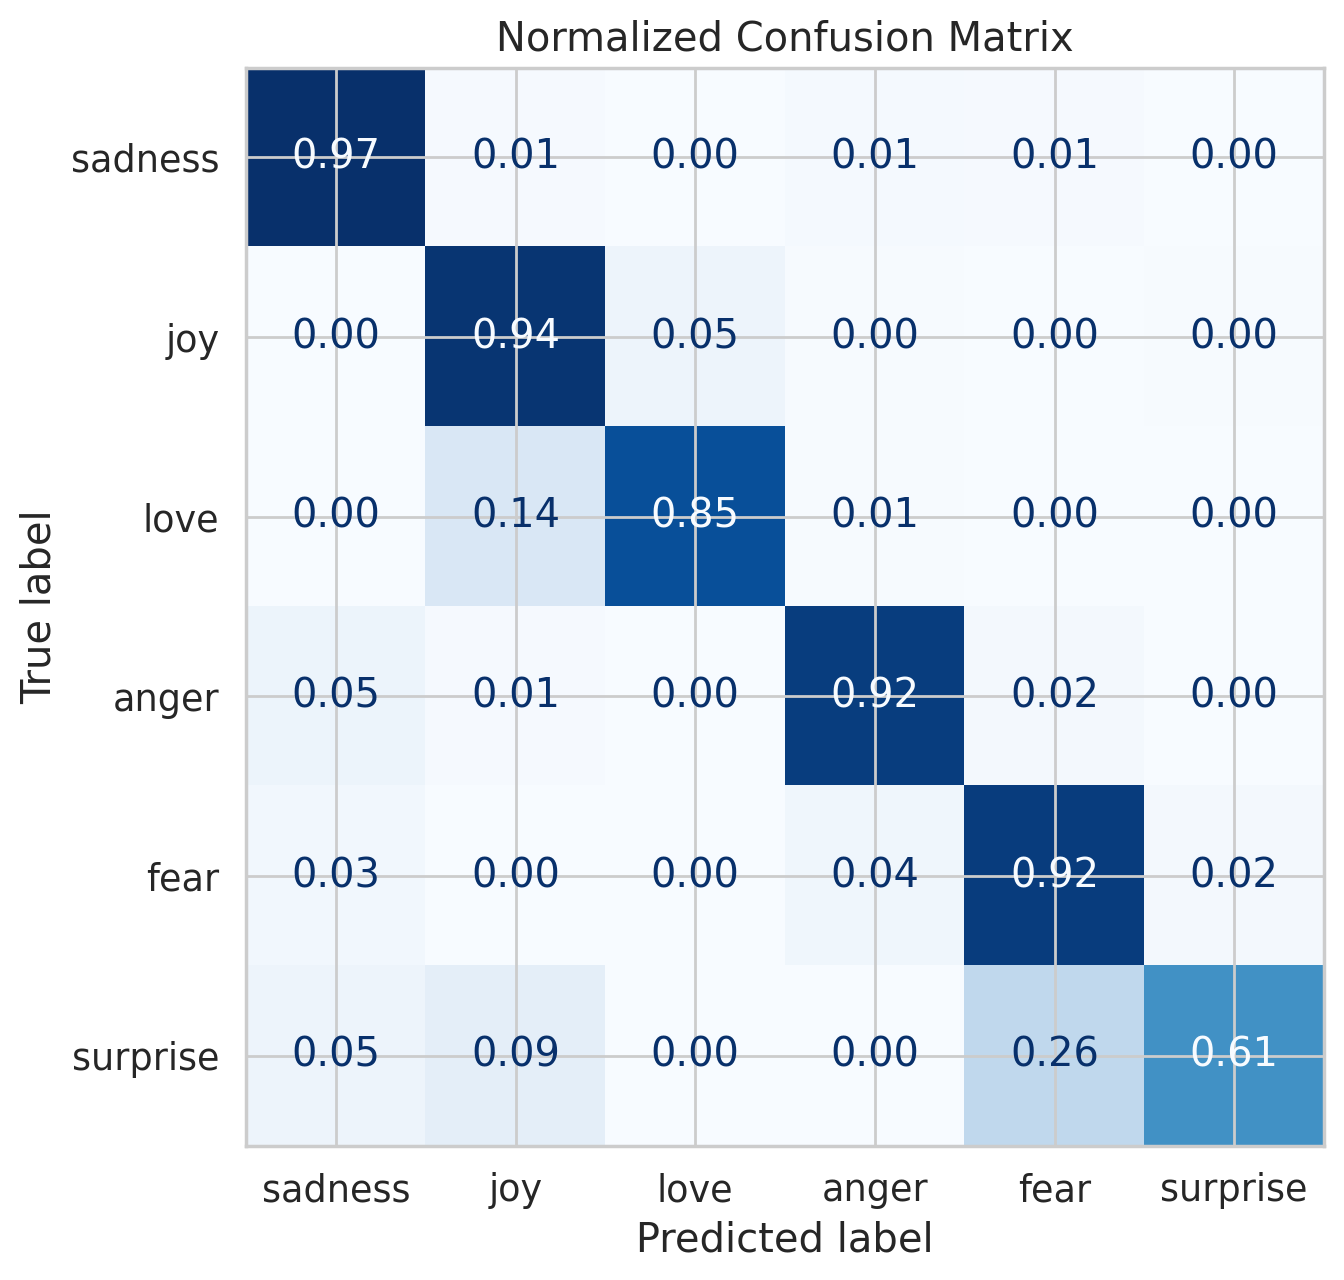

In [105]:
plot_confusion_matrics(y_test_preds, np.array(test_hidden_state['label']), labels)

# **Error Analysis**

In [106]:
from torch.nn.functional import cross_entropy

In [119]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [168]:
import torch
from torch.nn import functional as F

def forward_pass_with_label(batch):
    # Convert input_ids and attention_mask to tensors if they are lists
    input_ids = torch.tensor(batch['input_ids']).to(device)
    attention_mask = torch.tensor(batch['attention_mask']).to(device)

    # Ensure that labels are also converted to tensors
    labels = torch.tensor(batch['label']).to(device)

    # Make predictions
    with torch.no_grad():
        # Pass the inputs through the model
        output = model(input_ids=input_ids, attention_mask=attention_mask)

        # Get the predicted labels by taking argmax
        pred_labels = torch.argmax(output.logits, axis=-1)

        # Compute the loss
        loss = F.cross_entropy(output.logits, labels, reduction="none")

        # Return loss and predicted labels, moving them back to CPU if necessary
        return {"loss": loss.cpu().numpy(), "predicted_label": pred_labels.cpu().numpy()}


In [169]:
test_ds_tokenized = test_ds.map(tokenize, batched=True)
print(test_ds_tokenized[0])

{'text': 'im feeling rather rotten so im not very ambitious right now', 'label': 0, 'input_ids': [101, 10047, 3110, 2738, 11083, 2061, 10047, 2025, 2200, 12479, 2157, 2085, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [170]:
##using map(), we can apply above function to get the losses for all samples
# test_ds_tokenized.set_format("torch",
#                             columns=["input_ids", "attention_mask", "label"])

# print(test_ds_tokenized[0])

In [171]:
a = test_ds_tokenized.map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [172]:
print(a[0])

{'text': 'im feeling rather rotten so im not very ambitious right now', 'label': 0, 'input_ids': [101, 10047, 3110, 2738, 11083, 2061, 10047, 2025, 2200, 12479, 2157, 2085, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'loss': 0.004652864299714565, 'predicted_label': 0}


In [174]:
Ids2Label

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [179]:
a.set_format("pandas")
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = a[:][cols]
df_test['label_str'] = df_test['label'].map(Ids2Label)
df_test['pred_label_str'] = df_test['predicted_label'].map(Ids2Label)
df_test.head()

,text,label,predicted_label,loss,label_str,pred_label_str
0,im feeling rather rotten so im not very ambiti...,0,0,0.004653,sadness,sadness
1,im updating my blog because i feel shitty,0,0,0.004001,sadness,sadness
2,i never make her separate from me because i do...,0,0,0.004093,sadness,sadness
3,i left with my bouquet of red and yellow tulip...,1,1,0.004791,joy,joy
4,i was feeling a little vain when i did this one,0,0,0.004681,sadness,sadness


- we can now, easily sort data by losses

In [180]:
df_test.sort_values(by='loss', ascending=False).head(10)

,text,label,predicted_label,loss,label_str,pred_label_str
1382,i cannot even begin to express in words the de...,5,0,7.031922,surprise,sadness
816,whenever i put myself in others shoes and try ...,3,1,6.913879,anger,joy
1253,i don t feel betrayed coz the backstabber had ...,5,0,6.909337,surprise,sadness
1533,i actually was in a meeting last week where so...,3,0,5.753438,anger,sadness
290,i just feel are ludicrous and wasting space or...,5,0,5.523981,surprise,sadness
1928,i feel inside cause life is like a game someti...,4,0,5.086293,fear,sadness
150,im feeling rather angsty and listless,0,2,4.976284,sadness,love
468,i cant help feeling this way,0,1,4.848436,sadness,joy
1613,i feel very cheated since i am supporting the ...,1,0,4.624672,joy,sadness
1020,i know is that she s here and i m so thankful ...,0,1,4.602278,sadness,joy


In [181]:
## total_wrog pred_data
df_test[df_test['label_str'] != df_test['pred_label_str']]

,text,label,predicted_label,loss,label_str,pred_label_str
10,i don t feel particularly agitated,4,3,1.588135,fear,anger
20,im not sure the feeling of loss will ever go a...,0,1,2.308680,sadness,joy
40,i feel if i completely hated things i d exerci...,3,0,0.988794,anger,sadness
67,i feel a bit stressed even though all the thin...,3,0,1.221181,anger,sadness
72,i am right handed however i play billiards lef...,5,4,0.980319,surprise,fear
...,...,...,...,...,...,...
1928,i feel inside cause life is like a game someti...,4,0,5.086293,fear,sadness
1935,ive started feeling like almost nothing is wor...,4,3,1.251633,fear,anger
1943,i didn t mean to get angry with you bommie i j...,0,3,1.413406,sadness,anger
1957,i am feeling amazing and seeing the difference,5,1,0.896105,surprise,joy


In [182]:
df_test.shape

(2000, 6)

In [184]:
## correct predictions
df_test[df_test['label_str'] == df_test['pred_label_str']].sort_values(by='loss', ascending=True).head(10)

,text,label,predicted_label,loss,label_str,pred_label_str
1873,i entered the office though feeling the monday...,1,1,0.003394,joy,joy
1269,i like in this world and making a list of them...,1,1,0.003455,joy,joy
956,i woke up very early this morning feeling joyful,1,1,0.003506,joy,joy
672,i take a walk in the park feeling joyful,1,1,0.003538,joy,joy
1494,i feel like an ungrateful ass a href http this...,0,0,0.003573,sadness,sadness
719,i am so grateful to have been filled up by gen...,1,1,0.003582,joy,joy
1193,i start working full time next week where i m ...,0,0,0.003585,sadness,sadness
1410,i am feeling joyful every part of me feels hap...,1,1,0.003587,joy,joy
1434,i would do almost anything to have that feelin...,1,1,0.003606,joy,joy
116,i feel thoroughly virtuous even if the daily t...,1,1,0.003633,joy,joy


## load model from huggingFaceHub

In [189]:
from transformers import pipeline

# Load the model pipeline from Hugging Face
model_name = "distilbert-base-uncased_finetuned_on_emotions_data"
emotion_classifier = pipeline("text-classification", model=model_name)

# Example text for emotion classification
text = "I am feeling very happy today!"

# Predict the emotion
predictions = emotion_classifier(text)

# Output the predictions
print(predictions)


[{'label': 'LABEL_1', 'score': 0.9962221384048462}]


# After updating the config.json with label2id & id2label

In [190]:
from transformers import pipeline

In [191]:
name = "Shubhu07/distilbert-base-uncased_finetuned_on_emotions_data"
emotion_classifier = pipeline("text-classification", model=name)

config.json:   0%|          | 0.00/861 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [192]:
# Example text for emotion classification
text = "I am feeling very happy today!"

# Predict the emotion
predictions = emotion_classifier(text)

# Output the predictions
print(predictions)

[{'label': 'joy', 'score': 0.9962221384048462}]


In [209]:
# Example text for emotion classification
text = "I couldn’t believe I won the lottery!"

# Predict the emotion
predictions = emotion_classifier(text)

# Output the predictions
print(predictions)

[{'label': 'joy', 'score': 0.9183285236358643}]


In [212]:
# Assuming you have the necessary tokenizer and model
test_sentences = [
    "I am so happy to see my friends again!",
    "I can't believe they canceled the event at the last minute!",
    "I feel so lonely today, like no one understands me.",
    "I have a bad feeling about this trip; I’m really nervous.",
    "Wow, I didn’t expect that plot twist in the movie!",
    "That smell in the kitchen is absolutely disgusting!"
]

for i in test_sentences:
  predictions = emotion_classifier(i)
  print('sentence :', i)
  print("emotion :", predictions)
  print()



sentence : I am so happy to see my friends again!
emotion : [{'label': 'joy', 'score': 0.9936019778251648}]

sentence : I can't believe they canceled the event at the last minute!
emotion : [{'label': 'sadness', 'score': 0.9475700259208679}]

sentence : I feel so lonely today, like no one understands me.
emotion : [{'label': 'sadness', 'score': 0.9956610798835754}]

sentence : I have a bad feeling about this trip; I’m really nervous.
emotion : [{'label': 'fear', 'score': 0.9892753958702087}]

sentence : Wow, I didn’t expect that plot twist in the movie!
emotion : [{'label': 'joy', 'score': 0.8809731006622314}]

sentence : That smell in the kitchen is absolutely disgusting!
emotion : [{'label': 'anger', 'score': 0.9105125665664673}]



To reduce confusion between "joy" and "surprise" in your model:

1. **Review Data**: Ensure clear distinction between joy and surprise in training examples.
2. **Augment Data**: Add more specific examples to differentiate the two emotions.
3. **Fine-Tuning**: Fine-tune the model with additional data that highlights differences.
4. **Hyperparameter Tuning**: Adjust model training parameters (e.g., learning rate).
5. **Confidence Threshold**: Set a confidence threshold to label uncertain predictions as "uncertain".
6. **Inspect Probabilities**: Check the model's probability outputs to see if it's uncertain.
7. **Post-Processing**: Use rules to adjust predictions based on keywords like "shocked" for surprise.

You can also print the probability of each emotion for test sentences to better understand why the model is confused.